## Regression:
 1.let, ther are two variables x and y. We want to find relationship such that how much change in y(dependent) occurs with some change in x(independent). In such cases, we use linear regression.
 2.Relation between x and y is represented using straight line. 
 3.Aim is to find a straight line as close as every data point.

 Applications:
 1.To find how much y(dependent variable) is dependent on x(independent variable)
 2.To predict expected change in y value in future

In [1]:
import pandas as pd
import numpy as np

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("./USA_Housing.csv")

In [5]:
df.head(2)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."


In [6]:
df.drop(["Address"],axis=1,inplace=True)

In [7]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05
...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x = df.drop(['Price'],axis=1)
y = df["Price"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.4,random_state=101)

In [10]:
#Linear Regression
from sklearn.linear_model import LinearRegression

In [11]:
lg = LinearRegression()

In [12]:
lg.fit(x_train,y_train)

LinearRegression()

In [13]:
lg.intercept_

-2640159.796851911

In [14]:
lg.coef_

array([2.15282755e+01, 1.64883282e+05, 1.22368678e+05, 2.23380186e+03,
       1.51504200e+01])

In [15]:
cdf = pd.DataFrame(lg.coef_,x_train.columns,['Price'])

In [16]:
cdf

,Price
Avg. Area Income,21.528276
Avg. Area House Age,164883.282027
Avg. Area Number of Rooms,122368.678027
Avg. Area Number of Bedrooms,2233.801864
Area Population,15.150420


In [17]:
pred = lg.predict(x_test)

In [18]:
pred

array([1260960.70567626,  827588.75560352, 1742421.24254328, ...,
        372191.40626952, 1365217.15140895, 1914519.54178824])

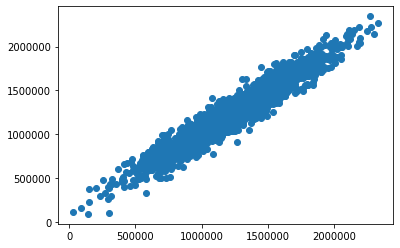

In [19]:
plt.scatter(y_test,pred)

In [20]:
from sklearn import metrics

In [21]:
metrics.mean_absolute_error(y_test,pred)

82288.22251914954

In [22]:
metrics.mean_squared_error(y_test,pred)

10460958907.209501

In [23]:
np.sqrt(metrics.mean_squared_error(y_test,pred))

102278.82922291153

In [24]:
metrics.r2_score(y_test,pred)

0.91768240096492

In [25]:
#Decison Tree Regression
from sklearn.tree import DecisionTreeRegressor

In [26]:
dt = DecisionTreeRegressor()

In [27]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [28]:
pred = dt.predict(x_test)

In [29]:
metrics.r2_score(y_test,pred)

0.7570486038812926

In [30]:
#Support Vector Regressor
from sklearn.svm import SVR

In [31]:
regressor_ = SVR()

In [32]:
regressor_.fit(x_train,y_train)

SVR()

In [34]:
pred = regressor_.predict(x_test)

In [35]:
metrics.r2_score(y_test,pred)

0.00016655466922643747

In [36]:
# KNN Regression
from sklearn.neighbors import KNeighborsRegressor

In [39]:
score = []
for k in range(1,100):
    k_reg = KNeighborsRegressor(n_neighbors=k)
    k_reg.fit(x_train,y_train)
    pred = k_reg.predict(x_test)
    score += [metrics.r2_score(y_test,pred)]

Text(0, 0.5, 'r2_score')

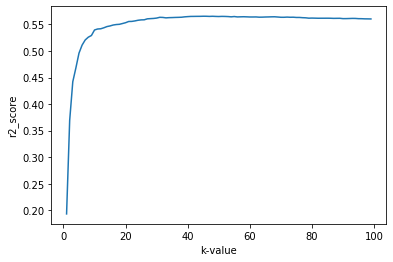

In [41]:
plt.plot(range(1,100),score)
plt.xlabel('k-value')
plt.ylabel('r2_score')

In [42]:
#ANN Regression
from sklearn.neural_network import MLPRegressor

In [43]:
mlp_reg = MLPRegressor()

In [44]:
mlp_reg.fit(x_train,y_train)

MLPRegressor()

In [45]:
pred = mlp_reg.predict(x_test)

In [46]:
metrics.r2_score(y_test,pred)

0.4967994329553056

In [47]:
mlp_reg = MLPRegressor(hidden_layer_sizes=(200,100,50,1))

In [48]:
mlp_reg.fit(x_train,y_train)

MLPRegressor(hidden_layer_sizes=(200, 100, 50, 1))

In [49]:
pred = mlp_reg.predict(x_test)

In [50]:
metrics.r2_score(y_test,pred)

0.4949558439089753